In [ ]:
!pip install keras-tuner

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix
from warnings import filterwarnings
import os

In [ ]:
filterwarnings("ignore")

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/10. Sentiment Analysis Using RNN")

In [ ]:
df = pd.read_csv("dataset/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

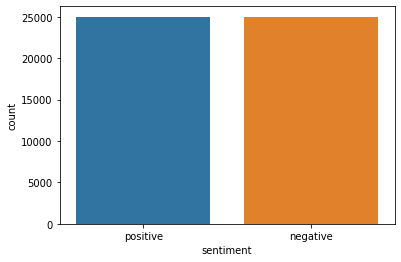

In [ ]:
sns.countplot(df["sentiment"])

In [ ]:
sentiment_mapper = {"negative":0, "positive":1}
df["label"] = df["sentiment"].map(sentiment_mapper)
df

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [ ]:
def clean_review(text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split()).lower()

In [ ]:
df["clean_review"] = df["review"].apply(lambda text: clean_review(text))

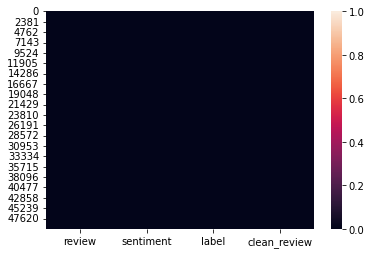

In [ ]:
sns.heatmap(df.isnull(),vmin= 0, vmax = 1)
plt.show()

In [ ]:
final_df = df[["clean_review", "label"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(final_df["clean_review"], final_df["label"], test_size = 0.2, random_state = 10, stratify = final_df["label"])

In [ ]:
review = np.array(x_train)
label = np.array(y_train)

In [ ]:
vocab_size = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = vocab_size)
encoder.adapt(review)

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[0:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'br', 'it', 'in',
       'i', 'this', 'that', 's', 'was', 'as', 'with', 'movie', 'for'],
      dtype='<U14')

In [ ]:
vocab[0:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'br', 'it', 'in',
       'i', 'this', 'that', 's', 'was', 'as', 'with', 'movie', 'for'],
      dtype='<U14')

In [ ]:
len(vocab)

1000

In [ ]:
t = encoder("This is a test statement").numpy()
t

array([12,  7,  4,  1,  1])

In [ ]:
def build_model():
    model = Sequential([
                        encoder, 
                        Embedding(input_dim = len(encoder.get_vocabulary()), output_dim = 64, mask_zero=True),
                        SimpleRNN(64),
                        Dense(512, activation = "relu"),
                        Dense(128, activation = "relu"),
                        Dense(1, activation = "sigmoid")
                        ])
    model.compile(loss = "binary_crossentropy", optimizer = Adam(1e-4), metrics = ["accuracy"])
    return model

In [ ]:
model = build_model()
M1 = model.fit(review, label, validation_split = 0.2, epochs = 5)

Epoch 1/5
1000/1000 [==============================] - 415s 413ms/step - loss: 0.5648 - accuracy: 0.6697 - val_loss: 0.3656 - val_accuracy: 0.8403
Epoch 2/5
1000/1000 [==============================] - 413s 413ms/step - loss: 0.3409 - accuracy: 0.8552 - val_loss: 0.3243 - val_accuracy: 0.8609
Epoch 3/5
1000/1000 [==============================] - 436s 436ms/step - loss: 0.3094 - accuracy: 0.8716 - val_loss: 0.3141 - val_accuracy: 0.8716
Epoch 4/5
1000/1000 [==============================] - 410s 410ms/step - loss: 0.2907 - accuracy: 0.8804 - val_loss: 0.3298 - val_accuracy: 0.8644
Epoch 5/5
1000/1000 [==============================] - 408s 408ms/step - loss: 0.2759 - accuracy: 0.8876 - val_loss: 0.3307 - val_accuracy: 0.8685


In [ ]:
results = model.predict(x_test)
results

array([[0.00573173],
       [0.01475257],
       [0.0129388 ],
       ...,
       [0.40449142],
       [0.00627962],
       [0.01244262]], dtype=float32)

In [71]:
len(results)

10000

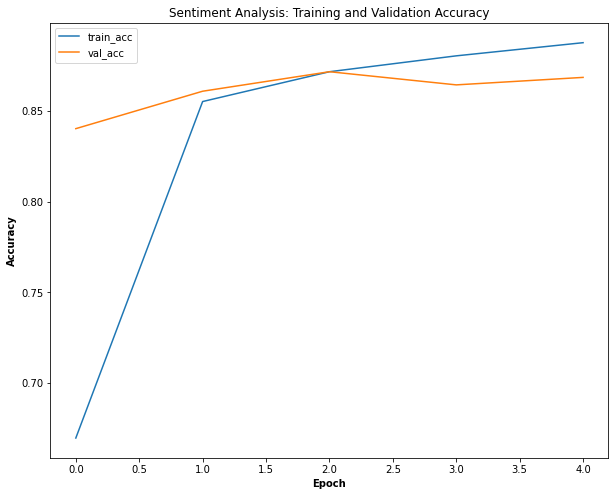

In [ ]:
plt.figure(figsize = [10,8])
plt.plot(np.arange(0, 5), M1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), M1.history["val_accuracy"], label="val_acc")
plt.title("Sentiment Analysis: Training and Validation Accuracy")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

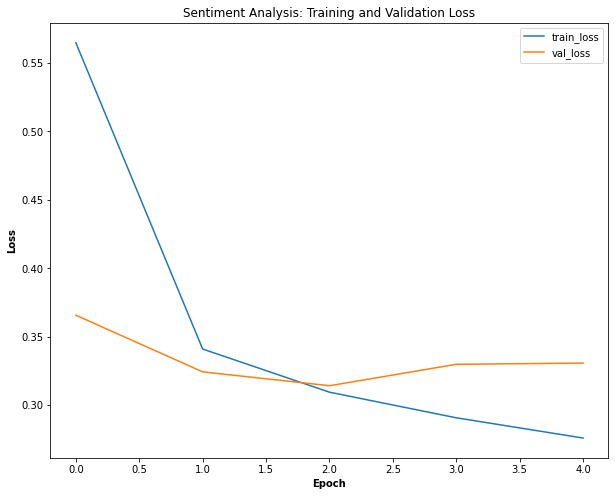

In [ ]:
plt.figure(figsize = [10,8])
plt.plot(np.arange(0, 5), M1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), M1.history["val_loss"], label="val_loss")
plt.title("Sentiment Analysis: Training and Validation Loss")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [58]:
def plot_roc(y_test, y_pred_prob):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    fig = plt.figure(figsize = (10,10))
    plt.plot(fpr, tpr)
    plt.plot([0,1], "r--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title("ROC curve for Sentiment Analysis")
    plt.text(0.2,0.7,("ROC AUC Score:",roc_auc_score(y_test, y_pred_prob)))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)

In [66]:
def model_evaluation(y_test, y_pred):
    print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred), "\n")
    print("classification_report --> \n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm)
    sns.heatmap(confusion, cbar =False, annot = True, fmt = "d")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

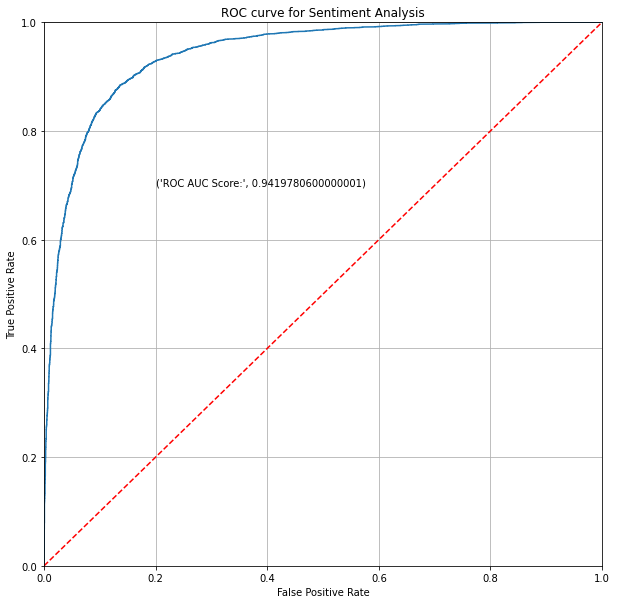

In [56]:
plot_roc(y_test, results)

In [ ]:
y_pred = [0 if  i < 0.5 else 1 for i in results ]
y_pred

Cohen Kappa Score: 0.7434000000000001 

classification_report --> 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      5000
           1       0.88      0.86      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



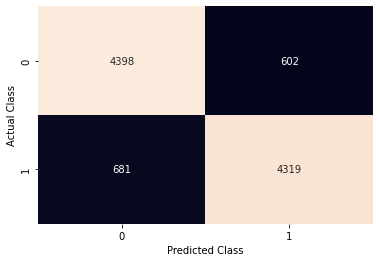

In [103]:
model_evaluation(y_test, y_pred)

In [ ]:
!pip install gradio

In [106]:
import gradio as gr
def predict_text(text):
    t = clean_review(text)
    pred = model.predict([t])
    if pred < 0.5:
        prediction = "negative"
    else:
        prediction = "positive"

    return prediction

im = gr.inputs.Textbox()
label = gr.outputs.Label()

gr.Interface(fn=predict_text, inputs=im, outputs=label, capture_session=True, title="Sentiment Analysis").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://25063.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f4bb81c9490>,
 'http://127.0.0.1:7861/',
 'https://25063.gradio.app')